In [2]:
# import import_ipynb
import Model.Location
from Model.Location import *
from Model.Enum_profile import *
from Model.Profile import *
import Data
from Data import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

'\nx = 0.08 \nprix_production = 0.1\nprix_injection = 0.09\nabonnement = 120\nprint(calcul.resultat_profil_B(x, abonnement))\n'

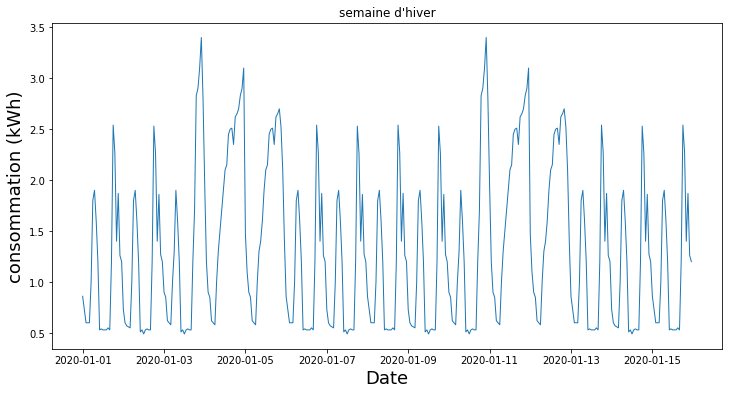

In [3]:
"""
This module allows you to perform operations from each Calculation Class (for the network)/
and Beoga Class (for the beoga offer)which is a daughter class.
"""
import Calculation
from Calculation import Calculation
from Model.Profile import *
from Model.Location import *

"""
user1 = Localisation( "France", "Southeast")
"""

p = Foyer("EDF", Location("France", "Southeast"), "Actif", 2, "profil_foyer")
calcul = Calculation(0.157, 6, p)
calcul.resultat_profil_A()
"""
x = 0.08 
prix_production = 0.1
prix_injection = 0.09
abonnement = 120
print(calcul.resultat_profil_B(x, abonnement))
"""


time
2020-01-01 00:00:00   -0.645000
2020-01-01 01:00:00   -0.547500
2020-01-01 02:00:00   -0.450000
2020-01-01 03:00:00   -0.450000
2020-01-01 04:00:00   -0.450000
2020-01-01 05:00:00   -0.750000
2020-01-01 06:00:00   -1.350000
2020-01-01 07:00:00   -1.320210
2020-01-01 08:00:00   -0.816766
2020-01-01 09:00:00   -0.023353
2020-01-01 10:00:00    0.859985
2020-01-01 11:00:00    1.047695
2020-01-01 12:00:00    1.012081
2020-01-01 13:00:00    0.725254
2020-01-01 14:00:00    0.224057
                         ...   
2020-12-31 09:00:00   -0.425150
2020-12-31 10:00:00    0.859416
2020-12-31 11:00:00    1.519266
2020-12-31 12:00:00    1.906751
2020-12-31 13:00:00    1.878548
2020-12-31 14:00:00    1.450689
2020-12-31 15:00:00    0.785452
2020-12-31 16:00:00    0.027051
2020-12-31 17:00:00   -0.805114
2020-12-31 18:00:00   -1.897500
2020-12-31 19:00:00   -1.695000
2020-12-31 20:00:00   -1.050000
2020-12-31 21:00:00   -1.395000
2020-12-31 22:00:00   -0.952500
2020-12-31 23:00:00   -0.900000
Nam

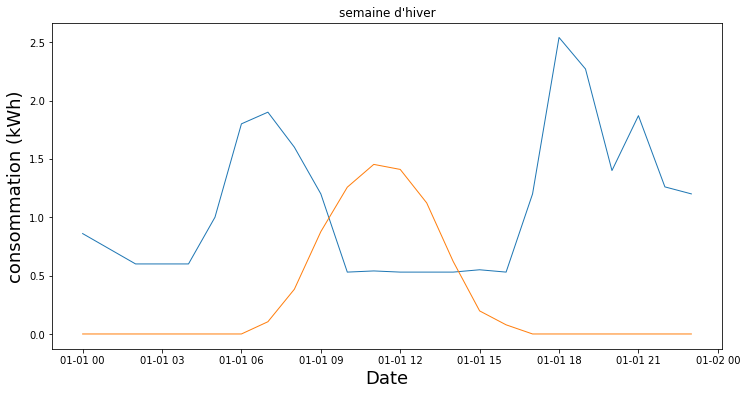

In [5]:
from Calculation import Calculation
from Model.Profile import *
from Model.Location import *
from Data import *
import matplotlib.pyplot as plt

class CalcProfileB(Calculation):
    def __init__(self, cout_by_kwh, capa_pv, p: Model.Profile.Foyer):
        super().__init__(cout_by_kwh, capa_pv, p)

    def calculate(self, cout_sale, subscription, production_price, injection_price):
        data['conso'] = data['Conso_inactif'] * self.profile.coupleMultiplier

        n_1 = 0
        for i in range(len(data['conso'])):
            n_1 = n_1 + data['conso'][i]
        conso_total = n_1

        # conso_total = sum(conso)
        data['production'] = data['Solaire_kwh'] * self.capa_pv * self.profile.location.multiplier['production']

        # Production Total

        production_Total = 0

        for e in range(len(data)):
            production_Total = production_Total + data['production'][e]

        # différence (prod - conso)

        for sup in range(len(data)):
            data['difference'] = data['production'] - data['conso']
        print(data['difference'])

        # Surplus

        for elt in range(len(data)):

            if data['difference'][elt] > 0:
                data['surplus'] = data['difference'][elt]
            else:
                data['surplus'] = 0

        # Surplus Total

        surplus_Total = 0

        for elm in range(len(data)):
            surplus_Total = surplus_Total + data['surplus'][elm]

        conso_sur_pv = production_Total - surplus_Total
        new_conso = conso_total - conso_sur_pv
        bill = self.cout_by_kwh * new_conso

        # Sale
        sale = production_Total * cout_sale

        # Courbe
        plt.figure(figsize=(12, 6))
        plt.title("semaine d'hiver")
        plt.xlabel('Date', fontsize=18)
        plt.ylabel('consommation (kWh)', fontsize=18)
        g = data[['Conso_inactif', 'production']]
        d = g['1 jan 2020']
        plt.plot(d, lw=1)

        print("total consumption : ", conso_total, "\n", " the customer's bill : ", bill, "\n",
              "the sale is: ", sale, "\n", "the total Pv production is: ", production_Total, "\n",
              "energy_value for total sale",
              self.total_energy_value_sale(sale, bill, subscription, production_Total, production_price),
              "\n",
              "energy_value for injection is ",
              self.energy_value_injection(bill, subscription, surplus_Total, injection_price))

        return None

p = Foyer("EDF", Location("France", "Southeast"), "Actif", 2, "profil_foyer")
calcul = CalcProfileB(0.157, 6, p)
calcul.calculate(0.05,100,1.2,1.1)
print('Done')

